## Lead Scoring Case Study
The target varaible is "Converted" and it is needed to check whether whether a lead has been successfully converted or not.

### Step 1: Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing the data
lead = pd.read_csv(r'D:\Upgrad\Python\Lead scoring\Lead Scoring Assignment\Leads.csv')

### Step 2: Inspecting the Dataframe

In [4]:
# Let's see the head of our master dataset
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe
lead.shape

(9240, 37)

In [6]:
lead.size

341880

In [7]:
# let's look at the statistical aspects of the dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Let's see the type of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Preparation

#### Check the missing value

In [9]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
lead.isnull().sum().unique()

array([   0,   36,  137,  103, 2461, 1438, 2207, 2690, 2709, 3353, 4767,
       1420, 4218], dtype=int64)

In [11]:
Not_Missing = lead.dropna(axis = 1)
Not_Missing

,Prospect ID,Lead Number,Lead Origin,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,No,No,0,0,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,No,No,0,674,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,No,No,1,1532,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,No,No,0,305,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,No,No,1,1428,No,No,No,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Yes,No,1,1845,No,No,No,No,No,No,No,No,No,No,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,No,No,0,238,No,No,No,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Yes,No,0,199,No,No,No,No,No,No,No,No,No,No,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,No,No,1,499,No,No,No,No,No,No,No,No,No,No,No,No,SMS Sent


In [12]:
# There are only 20 columns without missing values.

In [13]:
# check columns with  with more than 40% ssing values.
(lead.isnull().sum()*100/len(lead)).sort_values(ascending = True)

Prospect ID                                       0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
Magazine                                          0.000000
Search                                            0.000000
Newspaper Article                                 0.000000
Last Notable Activity                             0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Total Time Spent on Website                       0.0000

In [14]:
missing_40 = (lead.isnull().sum()*100/len(lead))[(lead.isnull().sum()*100/len(lead)) > 40]

In [15]:
missing_40

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

In [16]:
missing_40.count()

5

In [17]:
#There are 5 columns with more than 40% missing values.
# It is needed to delete these missing values.
lead.drop(columns = missing_40.index, inplace = True)

In [18]:
lead.shape

(9240, 32)

In [19]:
#The remaining columns are 31.

In [20]:
#### The variables "City" and "Country" are not required for analysis. It is better to drop these variables.

In [21]:
lead.drop(['City'], axis = 1, inplace = True)
lead.drop(['Country'], axis = 1, inplace = True)

In [22]:
lead.shape

(9240, 30)

In [23]:
#The remaining columns are 30.

#### check the variables type

In [24]:
x = lead.columns
print(x)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [25]:
# Get the value counts of all the columns

for column in lead:
    print(lead[column].value_counts())
    print('')

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64

660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference      

In [26]:
### The label "select" under some variables implies that
### the customer had not selected this option while filling the form.
### Thus, "select" is also considered as null value.
### The variables "Lead Profile", "How did you hear about X Education" and "Specialization"
### have the label "select". The number of "select"s are very high for "Lead Profile", and "How did you hear about X Education".
### Better to drop these variables.

In [27]:
lead.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

#### There are a few variables with majority of values are marked as "no". Better to drop these variables.

In [28]:
#### drop variables with large number of nos:
lead.drop(['Search', 'Do Not Call', 'Magazine', 'Receive More Updates About Our Courses',
           'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations',
            'Update me on Supply Chain Content', 'I agree to pay the amount through cheque',
           'Get updates on DM Content', "Tags"], axis = 1, inplace = True)

In [29]:
#### The variables "Prospect ID" and "Lead Number" are insignificant in this analysis. It is better to drop these variables.
lead.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [30]:
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [31]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [32]:
#### It is already observed that the variable "What matters most to you in choosing a course" has high value of 6528
#### for label "Better Career Prospects" and values of 1 and 2 for other categories.
#### That is, the it is clear that only for beter carrer prospect people join courses/
#### SO, further anyalysis based on this variable is not required.

In [33]:
lead.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [34]:
# Check again the number of missing values:

lead.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [35]:
#### Remove the null values for "What is your current occupation".
lead = lead[~pd.isnull(lead['What is your current occupation'])]

In [36]:
# Check again the number of missing values:

lead.isnull().sum()

Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [37]:
#### Remove the null values for "TotalVisits".
lead = lead[~pd.isnull(lead['TotalVisits'])]

In [38]:
# Check again the number of missing values:

lead.isnull().sum()

Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [39]:
#### Remove the null values for "Lead Source".
lead = lead[~pd.isnull(lead['Lead Source'])]

In [40]:
# Check again the number of missing values:

lead.isnull().sum()

Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [41]:
#### Remove the null values for "Specialization".
lead = lead[~pd.isnull(lead['Specialization'])]

In [42]:
# Check again the number of missing values:

lead.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [43]:
#### The rate of data without missing values are obtianed.
print(round((len(lead.index)/9248)*100,0))

69.0


In [44]:
#### Hence, nearly 69% of the data retained.

#### For categorical variables with multiple levels, create dummy features

In [45]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
var_need_to_dummy = lead.loc[:, lead.dtypes == 'object']
var_need_to_dummy.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

In [47]:
# The  variable 'Specialization'  has the level 'Select' that is useless.
# Thus, the dummy variable for the variable 'Specialization' is created separately and drop that level by mentioning it explicitly

dummy_Specialization = pd.get_dummies(lead['Specialization'], prefix = 'Specialization')
dummy_Specialization = dummy_Specialization.drop(['Specialization_Select'], 1)
lead = pd.concat([lead, dummy_Specialization], axis = 1)

#### Dropping the repeated variables

In [48]:
# We have created dummies for the below variables, so we can drop them
lead = lead.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [49]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6373 non-null   int64  
 1   TotalVisits                                           6373 non-null   float64
 2   Total Time Spent on Website                           6373 non-null   int64  
 3   Page Views Per Visit                                  6373 non-null   float64
 4   Lead Origin_Landing Page Submission                   6373 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6373 non-null   uint8  
 6   Lead Origin_Lead Import                               6373 non-null   uint8  
 7   Lead Source_Direct Traffic                            6373 non-null   uint8  
 8   Lead Source_Facebook                                  6373

Now all variables as numeric.

In [51]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,...,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000
mean,0.480935,3.624196,535.224541,2.480464,0.568806,0.091166,0.004237,0.293896,0.004394,0.321356,...,0.043622,0.021340,0.104033,0.025263,0.061353,0.012239,0.009101,0.003923,0.043151,0.023380
std,0.499676,5.048555,565.374753,2.167364,0.495282,0.287867,0.064956,0.455581,0.066143,0.467034,...,0.204268,0.144526,0.305327,0.156935,0.239995,0.109960,0.094971,0.062514,0.203212,0.151119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,287.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,1022.000000,3.500000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
lead.shape

(6373, 75)

In [53]:
#### Checking for Outliers

In [54]:
# Checking for outliers in the continuous variables (except target variable)
num_lead = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [55]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6373.000000,6373.000000,6373.000000
mean,3.624196,535.224541,2.480464
std,5.048555,565.374753,2.167364
min,0.000000,0.000000,0.000000
25%,1.000000,34.000000,1.000000
50%,3.000000,287.000000,2.000000
75%,5.000000,1022.000000,3.500000
90%,8.000000,1428.800000,5.000000
95%,10.000000,1592.400000,6.000000
99%,18.000000,1849.280000,9.000000


In [56]:
## Import several libraries to perform the analysis.
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

def plotvariable(df, variable):
    plt.figure(figsize = (16,4))
    #histogram
    plt.subplot(3,3,1)
    plt.hist(df[variable], alpha = 0.5)
    #boxplot
    plt.subplot(3,3,2)
    plt.boxplot(df[variable])
    plt.show()

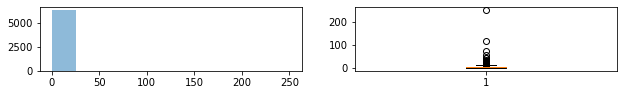

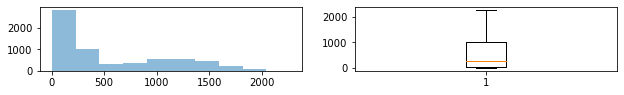

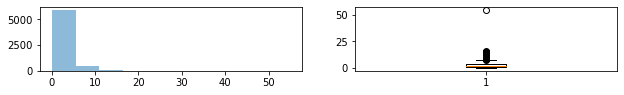

In [57]:
plotvariable(num_lead, ['TotalVisits'])
plotvariable(num_lead, ['Total Time Spent on Website'])
plotvariable(num_lead, ['Page Views Per Visit'])

In [58]:
#### The distributions of the continuous variables are skewed and does not follows normal distribution.
#### Moreover, the variables "TotalVisits" and "Page Views Per Visit" are having outliers.

#### any observation is higher than [Q3 + 1.5 * IQR] or lower than [Q1 - 1.5 * IQR] is cosndered as outliers.

In [59]:
def find_boundaries(df, variables):
    
    Q1 = df[variables].quantile(0.25)
    Q3 = df[variables].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    return lb, ub

In [60]:
lower_bound_TV, upper_bound_TV = find_boundaries(num_lead, 'TotalVisits')
lower_bound_TTSW, upper_bound_TTSW = find_boundaries(num_lead, 'Total Time Spent on Website')
lower_bound_PVPV, upper_bound_PVPV = find_boundaries(num_lead, 'Page Views Per Visit')

In [61]:
print(lower_bound_TV, upper_bound_TV)
print(lower_bound_TTSW, upper_bound_TTSW)
print(lower_bound_PVPV, upper_bound_PVPV)

-5.0 11.0
-1448.0 2504.0
-2.75 7.25


In [62]:
outlier_TV = np.where(num_lead['TotalVisits'] > upper_bound_TV, True,
                     np.where(num_lead['TotalVisits'] < lower_bound_TV, True, False))
pd.DataFrame(outlier_TV).value_counts()

False    6168
True      205
dtype: int64

In [63]:
outlier_TTSW = np.where(num_lead['Total Time Spent on Website'] > upper_bound_TTSW, True,
                     np.where(num_lead['Total Time Spent on Website'] < lower_bound_TTSW, True, False))
pd.DataFrame(outlier_TTSW).value_counts()

False    6373
dtype: int64

In [64]:
outlier_PVPV = np.where(num_lead['Page Views Per Visit'] > upper_bound_PVPV, True,
                     np.where(num_lead['Page Views Per Visit'] < lower_bound_PVPV, True, False))
pd.DataFrame(outlier_PVPV).value_counts()

False    6220
True      153
dtype: int64

In [65]:
X = lead[(lead['TotalVisits'] < 11.0) & (lead['TotalVisits'] > -5.0)]

In [66]:
Y = X[(X['Total Time Spent on Website'] < 2504.0) & (X['Total Time Spent on Website'] > -1448.0)]

In [67]:
lead1 = Y[(Y['Page Views Per Visit'] < 7.25) & (Y['Page Views Per Visit'] > -2.75)]

In [68]:
lead1.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,5987.000000,5987.000000,5987.000000,5987.000000,5987.000000,5987.000000,5987.000000,5987.000000,5987.000000,5987.000000,...,5987.000000,5987.000000,5987.000000,5987.000000,5987.000000,5987.000000,5987.000000,5987.000000,5987.000000,5987.000000
mean,0.477535,2.931518,520.787540,2.247961,0.555871,0.096375,0.004343,0.293970,0.004510,0.326040,...,0.043761,0.021714,0.106564,0.023885,0.061801,0.012193,0.008017,0.003675,0.041423,0.021213
std,0.499537,2.345953,561.903101,1.732504,0.496910,0.295130,0.065762,0.455617,0.067009,0.468801,...,0.204581,0.145759,0.308584,0.152704,0.240813,0.109756,0.089188,0.060512,0.199283,0.144105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,271.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,1008.500000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,10.000000,2272.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
lead1.shape

(5987, 75)

In [70]:
lead1.size

449025

From the distribution obtained above, it is observed that there are no outliers in the data and the numbers are gradually increasing.

### Step 4: Test-Train Split

In [71]:
from sklearn.model_selection import train_test_split
# Assign feature variable to X
X = lead1.drop(['Converted'], axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Assign response variable to y
y = lead1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [73]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Step 5: Feature Scaling

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
3082,0.4,0.090546,0.571429,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5470,0.4,0.577008,0.571429,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8006,0.3,0.072792,0.428571,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1525,0.3,0.347537,0.428571,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3343,0.0,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### Step 7: Model Building
Splitting our data into a training set and a test set.

#### Running Your First Training Model

In [76]:
import statsmodels.api as sm

In [77]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4190
Model:                            GLM   Df Residuals:                     4120
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 11 Apr 2023   Deviance:                   1.0933e+05
Time:                        08:46:29   Pearson chi2:                 5.35e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.866e+15   8.77e+07   2.13e+07      0.000    1.87e+15    1.87e+15
TotalVisits                                           2.138e+15    7.7e+06   2.77e+08      0.000    2.14e+15    2.14e+15
Total Time Spent on Website                           4.995e+14   4.88e+06   1.02e+08      0.000       5e+14       5e+14
Page Views Per Visit                                 -1.404e+15   7.62e+06  -1.84e+08      0.000    -1.4e+15    -1.4e+15
Lead Origin_Landing Page Submission                  -2.981e+14      4e+06  -7.46e+07      0.000   -2.98e+14   -2.98e+14
Lead Origin_Lead Add Form                             5.974e+15   6.76e+07   8.84e+07      0.000    5.97e+15    5.97e+15
Lead Origin_Lead Import                               2.217e+15   7.02e+07   3.16e+07      0.000    2.22e+15    2.22e+15
Lead Source_Direct Traffic                            3.834e+15   7.82e+07    4.9e+07      0.000    3.83e+15    3.83e+15
Lead Source_Facebook                                  2.383e+14   1.03e+08    2.3e+06      0.000    2.38e+14    2.38e+14
Lead Source_Google                                    4.033e+15   7.82e+07   5.16e+07      0.000    4.03e+15    4.03e+15
Lead Source_Live Chat                                  2.76e+15   7.77e+07   3.55e+07      0.000    2.76e+15    2.76e+15
Lead Source_Olark Chat                                3.675e+15   7.79e+07   4.71e+07      0.000    3.67e+15    3.67e+15
Lead Source_Organic Search                            3.898e+15   7.83e+07   4.98e+07      0.000     3.9e+15     3.9e+15
Lead Source_Pay per Click Ads                          -35.1984   5.18e-07  -6.79e+07      0.000     -35.198     -35.198
Lead Source_Press_Release                             1.153e+15   1.04e+08   1.11e+07      0.000    1.15e+15    1.15e+15
Lead Source_Reference                                -1.064e+15   3.91e+07  -2.72e+07      0.000   -1.06e+15   -1.06e+15
Lead Source_Referral Sites                            3.752e+15   7.89e+07   4.75e+07      0.000    3.75e+15    3.75e+15
Lead Source_Social Media                              2.562e+14   1.04e+08   2.47e+06      0.000    2.56e+14    2.56e+14
Lead Source_WeLearn                                    -62.0951   1.48e-06   -4.2e+07      0.000     -62.095     -62.095
Lead Source_Welingak Website                         -7.663e+13   3.97e+07  -1.93e+06      0.000   -7.66e+13   -7.66e+13
Lead Source_bing                                      2.269e+15   9.14e+07   2.48e+07      0.000    2.27e+15    2.27e+15
Lead Source_testone                                   4.181e+15   1.03e+08   4.06e+07      0.000    4.18e+15    4.18e+15
Do Not Email_Yes                                      -7.4

### Step 7: Feature Selection Using RFE

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [79]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [80]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 45),
 ('Lead Source_Direct Traffic', False, 32),
 ('Lead Source_Facebook', False, 34),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 51),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 58),
 ('Lead Source_Press_Release', False, 56),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 54),
 ('Lead Source_WeLearn', False, 59),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 40),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 8),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link C

In [82]:
col = X_train.columns[rfe.support_]

In [83]:
X_train = X_train[col]

##### Assessing the model with StatsModels

In [84]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4190
Model:                            GLM   Df Residuals:                     4174
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1919.4
Date:                Tue, 11 Apr 2023   Deviance:                       3838.9
Time:                        08:46:31   Pearson chi2:                 4.59e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3736
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1213      0.819     -1.369      0.171      -2.727       0.484
Total Time Spent on Website                              4.5262      0.194     23.328      0.000       4.146       4.906
Lead Origin_Lead Add Form                                3.8827      0.246     15.814      0.000       3.401       4.364
Lead Source_Olark Chat                                   1.6462      0.121     13.555      0.000       1.408       1.884
Lead Source_Welingak Website                             2.4344      1.044      2.332      0.020       0.389       4.480
Do Not Email_Yes                                        -1.0363      0.223     -4.643      0.000      -1.474      -0.599
Last Activity_Email Bounced                             -1.2577      0.461     -2.726      0.006      -2.162      -0.353
Last Activity_Had a Phone Conversation                   1.5985      1.299      1.230      0.219      -0.948       4.145
Last Activity_Olark Chat Conversation                   -1.4553      0.196     -7.416      0.000      -1.840      -1.071
Last Activity_SMS Sent                                   1.1112      0.087     12.818      0.000       0.941       1.281
What is your current occupation_Housewife               22.8641   2.44e+04      0.001      0.999   -4.79e+04    4.79e+04
What is your current occupation_Student                 -1.2315      0.845     -1.457      0.145      -2.888       0.425
What is your current occupation_Unemployed              -1.0072      0.816     -1.235      0.217      -2.606       0.592
What is your current occupation_Working Professional     1.2909      0.835      1.546      0.122      -0.345       2.927
Last Notable Activity_Had a Phone Conversation          22.6476   2.44e+04      0.001      0.999   -4.79e+04    4.79e+04
Last Notable Activity_Unreachable                        2.6443      0.807      3.275      0.001       1.062       4.227
========================================================================================================================
"""

###### There are a few variables with high p value and as a result of that those variables are insignificant.

#### Checking VIFs

In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,3.23
6,Last Activity_Had a Phone Conversation,3.01
13,Last Notable Activity_Had a Phone Conversation,3.00
0,Total Time Spent on Website,2.35
4,Do Not Email_Yes,1.75
5,Last Activity_Email Bounced,1.70
8,Last Activity_SMS Sent,1.70
1,Lead Origin_Lead Add Form,1.65
2,Lead Source_Olark Chat,1.54
12,What is your current occupation_Working Profes...,1.52


In [86]:
#### The variable "Last Notable Activity_Had a Phone Conversation" has high p-value and high VIF. As a result of that it is insignificant.
#### It is needed to drop this variable and rebuild the model.

In [87]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', 1, inplace = True)

In [88]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4190
Model:                            GLM   Df Residuals:                     4175
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1920.8
Date:                Tue, 11 Apr 2023   Deviance:                       3841.7
Time:                        08:46:32   Pearson chi2:                 4.59e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3732
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1206      0.819     -1.368      0.171      -2.726       0.485
Total Time Spent on Website                              4.5245      0.194     23.326      0.000       4.144       4.905
Lead Origin_Lead Add Form                                3.8821      0.246     15.812      0.000       3.401       4.363
Lead Source_Olark Chat                                   1.6457      0.121     13.552      0.000       1.408       1.884
Lead Source_Welingak Website                             2.4343      1.044      2.332      0.020       0.389       4.480
Do Not Email_Yes                                        -1.0363      0.223     -4.643      0.000      -1.474      -0.599
Last Activity_Email Bounced                             -1.2576      0.461     -2.726      0.006      -2.162      -0.353
Last Activity_Had a Phone Conversation                   3.2035      1.091      2.937      0.003       1.065       5.342
Last Activity_Olark Chat Conversation                   -1.4552      0.196     -7.416      0.000      -1.840      -1.071
Last Activity_SMS Sent                                   1.1111      0.087     12.818      0.000       0.941       1.281
What is your current occupation_Housewife               21.8637   1.48e+04      0.001      0.999    -2.9e+04    2.91e+04
What is your current occupation_Student                 -1.2316      0.845     -1.457      0.145      -2.888       0.425
What is your current occupation_Unemployed              -1.0073      0.816     -1.235      0.217      -2.606       0.592
What is your current occupation_Working Professional     1.2905      0.835      1.546      0.122      -0.346       2.927
Last Notable Activity_Unreachable                        2.6440      0.807      3.275      0.001       1.062       4.226
========================================================================================================================
"""

In [89]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,3.23
0,Total Time Spent on Website,2.35
4,Do Not Email_Yes,1.75
5,Last Activity_Email Bounced,1.70
8,Last Activity_SMS Sent,1.70
1,Lead Origin_Lead Add Form,1.65
2,Lead Source_Olark Chat,1.54
12,What is your current occupation_Working Profes...,1.52
3,Lead Source_Welingak Website,1.31
7,Last Activity_Olark Chat Conversation,1.25


In [90]:
#### The variable "What is your current occupation_Housewife" has high p-value. As a result of that it is insignificant.
#### It is needed to drop this variable and rebuild the model.

In [91]:
X_train.drop('What is your current occupation_Housewife', 1, inplace = True)

In [92]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4190
Model:                            GLM   Df Residuals:                     4176
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1923.0
Date:                Tue, 11 Apr 2023   Deviance:                       3846.0
Time:                        08:46:32   Pearson chi2:                 4.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3726
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1723      0.710     -0.242      0.808      -1.565       1.220
Total Time Spent on Website                              4.5164      0.194     23.306      0.000       4.137       4.896
Lead Origin_Lead Add Form                                3.8826      0.245     15.822      0.000       3.402       4.364
Lead Source_Olark Chat                                   1.6410      0.121     13.518      0.000       1.403       1.879
Lead Source_Welingak Website                             2.4314      1.044      2.329      0.020       0.386       4.477
Do Not Email_Yes                                        -1.0364      0.223     -4.645      0.000      -1.474      -0.599
Last Activity_Email Bounced                             -1.2584      0.461     -2.728      0.006      -2.163      -0.354
Last Activity_Had a Phone Conversation                   3.2008      1.091      2.934      0.003       1.063       5.339
Last Activity_Olark Chat Conversation                   -1.4702      0.197     -7.470      0.000      -1.856      -1.084
Last Activity_SMS Sent                                   1.1092      0.087     12.801      0.000       0.939       1.279
What is your current occupation_Student                 -2.1746      0.743     -2.928      0.003      -3.630      -0.719
What is your current occupation_Unemployed              -1.9514      0.709     -2.753      0.006      -3.341      -0.562
What is your current occupation_Working Professional     0.3462      0.730      0.474      0.635      -1.085       1.778
Last Notable Activity_Unreachable                        2.6377      0.808      3.265      0.001       1.054       4.221
========================================================================================================================
"""

In [93]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.23
0,Total Time Spent on Website,2.35
4,Do Not Email_Yes,1.75
5,Last Activity_Email Bounced,1.70
8,Last Activity_SMS Sent,1.70
1,Lead Origin_Lead Add Form,1.64
2,Lead Source_Olark Chat,1.54
11,What is your current occupation_Working Profes...,1.51
3,Lead Source_Welingak Website,1.31
7,Last Activity_Olark Chat Conversation,1.25


In [94]:
#### The variable "What is your current occupation_Working Professional" has high p-value. As a result of that it is insignificant.
#### It is needed to drop this variable and rebuild the model.

In [95]:
X_train.drop('What is your current occupation_Working Professional', 1, inplace = True)

In [96]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4190
Model:                            GLM   Df Residuals:                     4177
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1923.1
Date:                Tue, 11 Apr 2023   Deviance:                       3846.3
Time:                        08:46:32   Pearson chi2:                 4.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3725
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.1540      0.187      0.821      0.411      -0.213       0.522
Total Time Spent on Website                    4.5156      0.194     23.305      0.000       4.136       4.895
Lead Origin_Lead Add Form                      3.8825      0.245     15.822      0.000       3.402       4.363
Lead Source_Olark Chat                         1.6408      0.121     13.516      0.000       1.403       1.879
Lead Source_Welingak Website                   2.4311      1.044      2.329      0.020       0.385       4.477
Do Not Email_Yes                              -1.0362      0.223     -4.646      0.000      -1.473      -0.599
Last Activity_Email Bounced                   -1.2566      0.461     -2.726      0.006      -2.160      -0.353
Last Activity_Had a Phone Conversation         3.2012      1.091      2.935      0.003       1.063       5.339
Last Activity_Olark Chat Conversation         -1.4738      0.197     -7.485      0.000      -1.860      -1.088
Last Activity_SMS Sent                         1.1102      0.087     12.819      0.000       0.940       1.280
What is your current occupation_Student       -2.5005      0.289     -8.652      0.000      -3.067      -1.934
What is your current occupation_Unemployed    -2.2777      0.181    -12.556      0.000      -2.633      -1.922
Last Notable Activity_Unreachable              2.6383      0.808      3.266      0.001       1.055       4.222
==============================================================================================================
"""

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.59
0,Total Time Spent on Website,1.94
4,Do Not Email_Yes,1.74
5,Last Activity_Email Bounced,1.70
8,Last Activity_SMS Sent,1.58
2,Lead Source_Olark Chat,1.46
1,Lead Origin_Lead Add Form,1.42
3,Lead Source_Welingak Website,1.29
7,Last Activity_Olark Chat Conversation,1.24
9,What is your current occupation_Student,1.08


In [98]:
#### In the above model all of the variables are significnat (p value less than 0.05) and lower VIF (< 5).
#### Hence, this model can be considered as final model.

## Model Evaluation

In [99]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

3082    0.152536
5470    0.979564
8006    0.142458
1525    0.848563
3343    0.381573
4909    0.948097
2840    0.111887
8066    0.393106
6003    0.445306
3147    0.919916
dtype: float64

In [100]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1525358 , 0.97956379, 0.1424583 , 0.84856299, 0.3815733 ,
       0.94809702, 0.11188683, 0.39310614, 0.44530582, 0.91991625])

In [101]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3082    0.152536
5470    0.979564
8006    0.142458
1525    0.848563
3343    0.381573
4909    0.948097
2840    0.111887
8066    0.393106
6003    0.445306
3147    0.919916
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1525358 , 0.97956379, 0.1424583 , 0.84856299, 0.3815733 ,
       0.94809702, 0.11188683, 0.39310614, 0.44530582, 0.91991625])

In [103]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.152536
1,1,0.979564
2,0,0.142458
3,0,0.848563
4,1,0.381573


##### Creating new column 'predicted' with 1 if Conversion_Prob> 0.5 else 0

In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted
0,0,0.152536,0
1,1,0.979564,1
2,0,0.142458,0
3,0,0.848563,1
4,1,0.381573,0


In [105]:
from sklearn import metrics

In [106]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1846  349]
 [ 528 1467]]


In [107]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692  

In [108]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7906921241050119

## Metrics beyond simply accuracy

In [109]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [110]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7353383458646616

In [111]:
# Let us calculate specificity
TN / float(TN+FP)

0.841002277904328

In [112]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.15899772209567198


In [113]:
# positive predictive value 
print (TP / float(TP+FP))

0.8078193832599119


In [114]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7775905644481887


### Step 8:ROC Curve

An ROC curve defines several things:

- It implies the tradeoff between sensitivity and specificity. That is, increase in sensitivity will be accompanied by a decrease in specificity).
- As the curve follows the left-hand border and then the top of the border of the ROC space, the test becomes more accurate.
- As the curve closer to the 45-degree diagonal of the ROC space, the test becomes less accurate.

In [115]:
import matplotlib.pyplot as plt

In [116]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

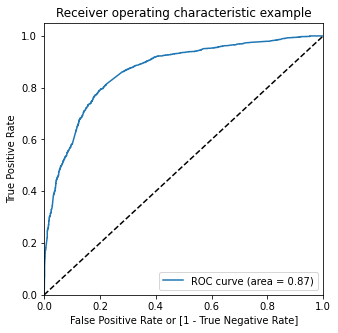

In [118]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Step 9: Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where the sensitivity and specificity got balanced

In [119]:
# Columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.152536,0,1,1,0,0,0,0,0,0,0,0
1,1,0.979564,1,1,1,1,1,1,1,1,1,1,1
2,0,0.142458,0,1,1,0,0,0,0,0,0,0,0
3,0,0.848563,1,1,1,1,1,1,1,1,1,1,0
4,1,0.381573,0,1,1,1,1,0,0,0,0,0,0


In [120]:
# The caclulation for accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.476134  1.000000  0.000000
0.1   0.1  0.525776  0.994486  0.099772
0.2   0.2  0.718616  0.932331  0.524374
0.3   0.3  0.760859  0.900752  0.633713
0.4   0.4  0.793317  0.797494  0.789522
0.5   0.5  0.790692  0.735338  0.841002
0.6   0.6  0.777327  0.668672  0.876082
0.7   0.7  0.742005  0.548371  0.917995
0.8   0.8  0.714797  0.451629  0.953986
0.9   0.9  0.649403  0.281704  0.983599


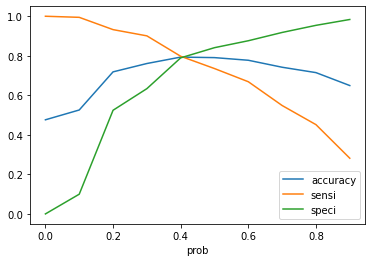

In [121]:
# Plot of accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.42 is the optimum point to take it as a cutoff probability.

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.152536,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.979564,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.142458,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.848563,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.381573,0,1,1,1,1,0,0,0,0,0,0,0


In [123]:
# The overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7961813842482101

In [124]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1762,  433],
       [ 421, 1574]], dtype=int64)

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
# The sensitivity of our logistic regression model
TP / float(TP+FN)

0.7889724310776942

In [127]:
# The specificity
TN / float(TN+FP)

0.8027334851936219

In [128]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19726651480637813


In [129]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7842551071250623


In [130]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8071461291800275


 ## Precision and Recall

In [131]:
#Looking at the confusion matrix again

In [132]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1846,  349],
       [ 528, 1467]], dtype=int64)

##### Precision
TP / TP + FP

In [133]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8078193832599119

##### Recall
TP / TP + FN

In [134]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7353383458646616

Using sklearn utilities for the same

In [135]:
from sklearn.metrics import precision_score, recall_score

In [136]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8078193832599119

In [137]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7353383458646616

### Precision and recall tradeoff

In [138]:
from sklearn.metrics import precision_recall_curve

In [139]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       0
 3       0
 4       1
        ..
 4185    1
 4186    1
 4187    1
 4188    1
 4189    0
 Name: Converted, Length: 4190, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       0
        ..
 4185    1
 4186    0
 4187    0
 4188    0
 4189    0
 Name: predicted, Length: 4190, dtype: int64)

In [140]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

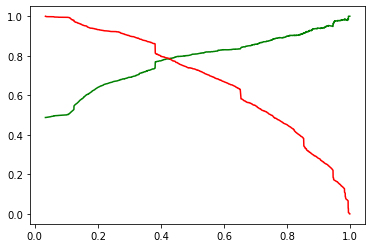

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [142]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [143]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
5403,0.426099,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2770,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4740,0.467821,0,0,0,0,0,0,0,0,0,0,1,0,0,0
588,0.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3097,0.223258,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [144]:
# Drop the required columns from X_test as well

X_test.drop(['What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

Making predictions on the test set

In [145]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [146]:
y_test_pred[:10]

5403    0.713123
2770    0.853059
4740    0.497197
588     0.106812
3097    0.906564
2365    0.290026
2341    0.903386
5484    0.060143
9220    0.274198
4613    0.998220
dtype: float64

In [147]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [148]:
# Let's see the head
y_pred_1.head()

,0
5403,0.713123
2770,0.853059
4740,0.497197
588,0.106812
3097,0.906564


In [149]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [150]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [151]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [152]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [153]:
y_pred_final.head()

,Converted,CustID,0
0,1,5403,0.713123
1,1,2770,0.853059
2,1,4740,0.497197
3,0,588,0.106812
4,1,3097,0.906564


In [154]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [155]:
titles = list(y_pred_final.columns)
titles[1],titles[2] = titles[2],titles[1]
titles

['Converted', 'Conversion_Prob', 'CustID']

In [156]:
# The head of y_pred_final
y_pred_final.head()

,Converted,CustID,Conversion_Prob
0,1,5403,0.713123
1,1,2770,0.853059
2,1,4740,0.497197
3,0,588,0.106812
4,1,3097,0.906564


In [157]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [158]:
y_pred_final.head()

,Converted,CustID,Conversion_Prob,final_predicted
0,1,5403,0.713123,1
1,1,2770,0.853059,1
2,1,4740,0.497197,1
3,0,588,0.106812,0
4,1,3097,0.906564,1


In [159]:
# The overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7740678909293267

In [160]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[716, 217],
       [189, 675]], dtype=int64)

In [161]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FP)

0.7567264573991032

In [163]:
# Let's see the specificity of our logistic regression model 
TN / float(TN+FP)

0.767416934619507

In [164]:
# Let us calculate Recall
TP / float(TP+FN)

0.78125